# A Comprehension of Intelligent Document Processing

Intelligent Document Processing (IDP) is an advanced automation technology that transforms the way businesses handle documents. By leveraging artificial intelligence (AI), IDP systems can automatically read, understand, and process vast quantities of documents, extracting crucial data and feeding it into various business workflows. This technology is a significant leap from traditional Optical Character Recognition (OCR) as it not only digitizes text but also comprehends the context and structure of the information within documents.

At its core, IDP is designed to tackle the challenge of processing unstructured and semi-structured data, which make up a large portion of business documents such as invoices, contracts, emails, and forms. By automating the extraction and interpretation of this data, IDP significantly reduces the need for manual data entry, leading to increased efficiency, higher accuracy, and substantial cost savings.

<br><br>

---
<br><br>

### The Inner Workings of Intelligent Document Processing

The power of IDP lies in its sophisticated multi-step process that intelligently handles documents from ingestion to data delivery. This process typically involves several key stages:

**1. Document Ingestion:** The first step involves importing documents from various sources and in multiple formats, including scanned paper documents, PDFs, Word files, and images.

**2. Pre-processing:** To enhance the quality of the input, documents undergo a pre-processing stage. This includes techniques like noise reduction, image enhancement, and deskewing to improve the accuracy of subsequent data extraction.

**3. Document Classification:** Using machine learning algorithms, the IDP system automatically categorizes documents based on their layout and content. This allows the system to differentiate between an invoice, a purchase order, or a legal contract, for instance.

**4. Data Extraction:** This is the core function of IDP. Advanced AI technologies, including Natural Language Processing (NLP) and computer vision, are employed to identify and extract relevant data fields. For example, from an invoice, it can pull out the invoice number, date, vendor name, and line-item details.

**5. Data Validation:** The extracted data is then validated against predefined rules and existing databases to ensure accuracy and consistency. Any exceptions or discrepancies can be flagged for human review in a "human-in-the-loop" process, which also helps to train and improve the AI model over time.

**6. Integration:** Finally, the structured and validated data is seamlessly integrated into downstream business systems such as Enterprise Resource Planning (ERP), Customer Relationship Management (CRM), or other databases, making the information readily available for further processing and analysis.


From **finance departments** automating invoice processing and expense management to **healthcare organizations** streamlining patient record management and claims processing, IDP is proving to be a game-changer. Even  **human resources** can expedite resume screening and employee onboarding. As the technology continues to evolve, its applications are expected to expand even further, solidifying its role as a cornerstone of modern digital transformation.

# Our Approach

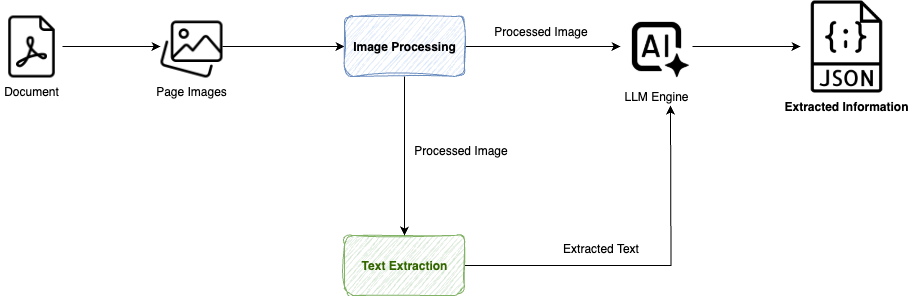

# **Assignment: Build a Smart Resume Parser Using OCR**

The goal is now to create a pipeline that can take an image of a resume and extract key information like the applicant's name, skills, certification and work experience into a structured JSON format.

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("snehaanbhawal/resume-dataset")

print("Path to dataset files:", path)

100%|██████████| 62.5M/62.5M [00:00<00:00, 127MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/snehaanbhawal/resume-dataset/versions/1


In [ ]:
import os

dataset_path = "/root/.cache/kagglehub/datasets/snehaanbhawal/resume-dataset/versions/1"

print(f"Contents of '{dataset_path}':")
print(os.listdir(dataset_path))

data_folder_path = os.path.join(dataset_path, 'data')
if os.path.exists(data_folder_path):
    print(f"\nContents of '{data_folder_path}':")
    print(os.listdir(data_folder_path))

    if os.listdir(data_folder_path):
        first_category = os.listdir(data_folder_path)[0]
        category_path = os.path.join(data_folder_path, first_category)
        if os.path.isdir(category_path):
            print(f"\nContents of the first category folder '{first_category}':")
            print(os.listdir(category_path)[:5]) # Show first 5 files

Contents of '/root/.cache/kagglehub/datasets/snehaanbhawal/resume-dataset/versions/1':
['Resume', 'data']

Contents of '/root/.cache/kagglehub/datasets/snehaanbhawal/resume-dataset/versions/1/data':
['data']

Contents of the first category folder 'data':
['PUBLIC-RELATIONS', 'FINANCE', 'CONSULTANT', 'TEACHER', 'HEALTHCARE']


Dataset consists of pdf , we need to convert them to image

In [ ]:
! pip install opencv-python matplotlib numpy

In [ ]:
import os
import random

resume_categories = [
    "ACCOUNTANT", "ADVOCATE", "AGRICULTURE", "APPAREL", "ARTS", "AUTOMOBILE",
    "AVIATION", "BANKING", "BPO", "BUSINESS-DEVELOPMENT", "CHEF", "CONSTRUCTION",
    "CONSULTANT", "DESIGNER", "DIGITAL-MEDIA", "ENGINEERING", "FINANCE",
    "FITNESS", "HEALTHCARE", "HR"
]

print("Resume Categories:", resume_categories)

# Collect all PDF file paths
all_resume_files = []
# Assuming 'path' is the base path to your dataset (e.g., '/kaggle/input/resume-dataset')
base_data_path = os.path.join(path, 'data', 'data')

#It collects paths of all PDF resume files from multiple category folders into one list.
for category in resume_categories:
    category_path = os.path.join(base_data_path, category)
    if os.path.isdir(category_path):
        for filename in os.listdir(category_path):
            if filename.endswith('.pdf'):
                all_resume_files.append(os.path.join(category_path, filename))

print(f"\nFound {len(all_resume_files)} PDF files in total.")

# Randomly select 20 resume files
num_to_select = 20
if len(all_resume_files) >= num_to_select:
    random_resumes = random.sample(all_resume_files, num_to_select)
    print(f"\nRandomly selected {num_to_select} resume files:")
    for resume_path in random_resumes:
        print(resume_path)
else:
    print(f"\nNot enough PDF files found to select {num_to_select}. Found only {len(all_resume_files)}.")
    random_resumes = all_resume_files # Select all if less than 20
    print(f"\nSelected all {len(random_resumes)} available resume files:")
    for resume_path in random_resumes:
        print(resume_path)

# Now you have the list 'random_resumes' containing the paths to 20 randomly selected PDF files.
# You can use the pdf_to_jpg function with these paths.

Resume Categories: ['ACCOUNTANT', 'ADVOCATE', 'AGRICULTURE', 'APPAREL', 'ARTS', 'AUTOMOBILE', 'AVIATION', 'BANKING', 'BPO', 'BUSINESS-DEVELOPMENT', 'CHEF', 'CONSTRUCTION', 'CONSULTANT', 'DESIGNER', 'DIGITAL-MEDIA', 'ENGINEERING', 'FINANCE', 'FITNESS', 'HEALTHCARE', 'HR']

Found 2035 PDF files in total.

Randomly selected 20 resume files:
/root/.cache/kagglehub/datasets/snehaanbhawal/resume-dataset/versions/1/data/data/ENGINEERING/32985311.pdf
/root/.cache/kagglehub/datasets/snehaanbhawal/resume-dataset/versions/1/data/data/ADVOCATE/27182111.pdf
/root/.cache/kagglehub/datasets/snehaanbhawal/resume-dataset/versions/1/data/data/HR/21265194.pdf
/root/.cache/kagglehub/datasets/snehaanbhawal/resume-dataset/versions/1/data/data/BUSINESS-DEVELOPMENT/14241621.pdf
/root/.cache/kagglehub/datasets/snehaanbhawal/resume-dataset/versions/1/data/data/ENGINEERING/33685075.pdf
/root/.cache/kagglehub/datasets/snehaanbhawal/resume-dataset/versions/1/data/data/HEALTHCARE/17963031.pdf
/root/.cache/kagglehub

In [ ]:
!pip install PyMuPDF

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 86.9 MB/s eta 0:00:00


In [ ]:
import os
import fitz  # PyMuPDF

def pdf_to_jpg(pdf_path, output_dir, suffix=""):
    """
    Converts a PDF file to JPG images, saving each page as a separate image.

    Args:
        pdf_path (str): The path to the input PDF file.
        output_dir (str): The directory to save the output JPG images.
        suffix (str): A suffix to add to the beginning of the output image filenames.
    """
    os.makedirs(output_dir, exist_ok=True)

    try:
        # Open the PDF file
        pdf_document = fitz.open(pdf_path)

        # Iterate through each page and convert to an image
        for page_number in range(pdf_document.page_count):
            page = pdf_document.load_page(page_number)
            pix = page.get_pixmap()

            # Save the image as JPG with the specified suffix
            output_image_path = os.path.join(output_dir, f"{suffix}page_{page_number + 1}.jpg")
            pix.save(output_image_path)
            print(f"Converted page {page_number + 1} of {os.path.basename(pdf_path)} to {output_image_path}")

        pdf_document.close()

    except FileNotFoundError:
        print(f"Error: PDF file not found at {pdf_path}")
    except Exception as e:
        print(f"An error occurred while processing {os.path.basename(pdf_path)}: {e}")

# Example usage of the function:
# Assuming 'path' variable is already defined from the dataset download
# If not, you might need to redefine it based on your dataset location
# path = '/root/.cache/kagglehub/datasets/snehaanbhawal/resume-dataset/versions/1'

# one_image_path = os.path.join(path, 'data', 'data', 'ACCOUNTANT', '10554236.pdf')
# output_directory = "/content/converted_images"
# suffix_name = "ACCOUNTANT1_" # Example suffix
# pdf_to_jpg(one_image_path, output_directory, suffix=suffix_name)

In [ ]:
!pip install pdf2image
!apt-get install -q poppler-utils

Reading package lists...
Building dependency tree...
Reading state information...
The following NEW packages will be installed:
  poppler-utils
0 upgraded, 1 newly installed, 0 to remove and 1 not upgraded.
Need to get 186 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 poppler-utils amd64 22.02.0-2ubuntu0.12 [186 kB]
Fetched 186 kB in 1s (236 kB/s)
Selecting previously unselected package poppler-utils.
(Reading database ... 117528 files and directories currently installed.)
Preparing to unpack .../poppler-utils_22.02.0-2ubuntu0.12_amd64.deb ...
Unpacking poppler-utils (22.02.0-2ubuntu0.12) ...
Setting up poppler-utils (22.02.0-2ubuntu0.12) ...
Processing triggers for man-db (2.10.2-1) ...


In [ ]:
import os
from pdf2image import convert_from_path
import matplotlib.pyplot as plt

# Assuming 'random_resumes' list is already populated from a previous step
# Assuming 'path' variable is the base path to your dataset (e.g., '/kaggle/input/resume-dataset')

output_base_dir = "/content/converted_random_resume_images_pdf2image"
os.makedirs(output_base_dir, exist_ok=True)

print(f"Converting {len(random_resumes)} randomly selected PDF files to JPG using pdf2image...")

for resume_path in random_resumes:
    try:
        # Extract category and filename for output directory and suffix
        # The path structure is assumed to be /kaggle/input/resume-dataset/data/data/CATEGORY/filename.pdf
        parts = resume_path.split(os.sep)
        if len(parts) >= 4:
            category = parts[-2]
            filename_without_ext = os.path.splitext(parts[-1])[0]
            output_subdir = os.path.join(output_base_dir, category)
            os.makedirs(output_subdir, exist_ok=True) # Ensure category subdir exists

            suffix = f"{category}_{filename_without_ext}_"

            # Convert PDF to a list of PIL Images
            images = convert_from_path(resume_path)

            # Save each page as a JPG
            for i, image in enumerate(images):
                output_image_path = os.path.join(output_subdir, f"{suffix}page_{i + 1}.jpg")
                image.save(output_image_path, 'JPEG')
                print(f"Converted page {i + 1} of {os.path.basename(resume_path)} to {output_image_path}")
        else:
            print(f"Skipping unexpected path format: {resume_path}")

    except Exception as e:
        print(f"An error occurred while processing {os.path.basename(resume_path)}: {e}")
        print("Please ensure 'poppler-utils' is installed and the file path is correct.")


print("\nConversion complete using pdf2image.")

Converting 20 randomly selected PDF files to JPG using pdf2image...
Converted page 1 of 32985311.pdf to /content/converted_random_resume_images_pdf2image/ENGINEERING/ENGINEERING_32985311_page_1.jpg
Converted page 1 of 27182111.pdf to /content/converted_random_resume_images_pdf2image/ADVOCATE/ADVOCATE_27182111_page_1.jpg
Converted page 2 of 27182111.pdf to /content/converted_random_resume_images_pdf2image/ADVOCATE/ADVOCATE_27182111_page_2.jpg
Converted page 1 of 21265194.pdf to /content/converted_random_resume_images_pdf2image/HR/HR_21265194_page_1.jpg
Converted page 2 of 21265194.pdf to /content/converted_random_resume_images_pdf2image/HR/HR_21265194_page_2.jpg
Converted page 3 of 21265194.pdf to /content/converted_random_resume_images_pdf2image/HR/HR_21265194_page_3.jpg
Converted page 1 of 14241621.pdf to /content/converted_random_resume_images_pdf2image/BUSINESS-DEVELOPMENT/BUSINESS-DEVELOPMENT_14241621_page_1.jpg
Converted page 2 of 14241621.pdf to /content/converted_random_resume_i

In [ ]:
import matplotlib.pyplot as plt
import cv2
import numpy as np

def display_image(image, title="Image"):
    plt.figure(figsize=(7, 7))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

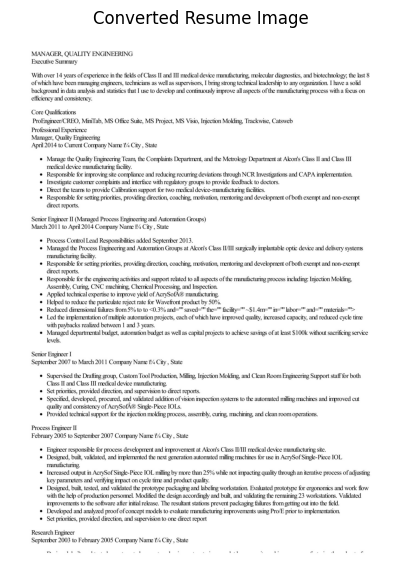

In [ ]:
one_image = cv2.imread("/content/converted_random_resume_images_pdf2image/ENGINEERING/ENGINEERING_33685075_page_1.jpg")
display_image(one_image, "Converted Resume Image")

Grayscale Conversion

In [ ]:
# Convert the image to grayscale
def convert_to_grayscale(image):
  return cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

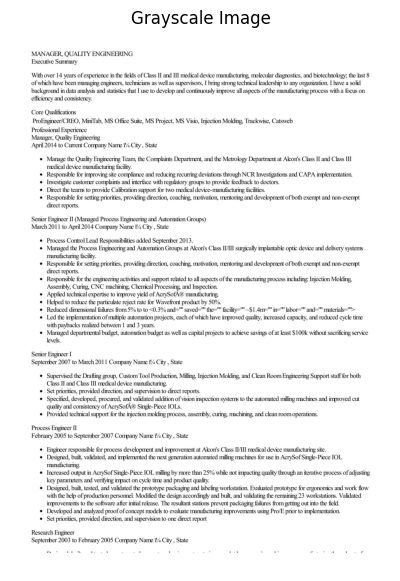

In [ ]:
grayscale_image = convert_to_grayscale(one_image)
display_image(grayscale_image, "Grayscale Image")

Noise (blur) Reduction

In [ ]:
def reduce_noise(gray_image):
  return cv2.GaussianBlur(gray_image, (5, 5), 0)

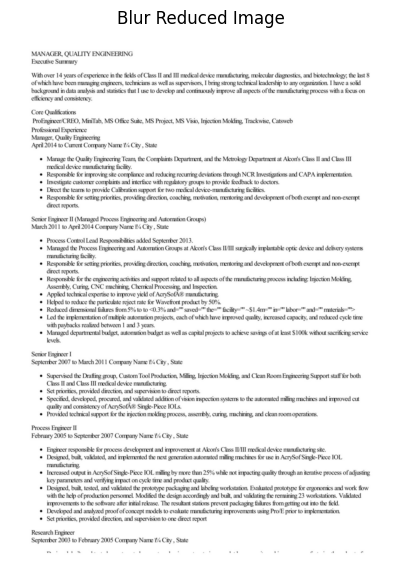

In [ ]:
blur_reduced_image = reduce_noise(grayscale_image)
display_image(blur_reduced_image, "Blur Reduced Image")

Binarization (Thresholding)

In [ ]:
def binarize_image(blur_reduced_image):
  return cv2.adaptiveThreshold(
    blur_reduced_image,
    255,
    cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
    cv2.THRESH_BINARY, # Invert the colors (text becomes white because of matplotlib)
    11, # Block size
    4  # Constant C
  )

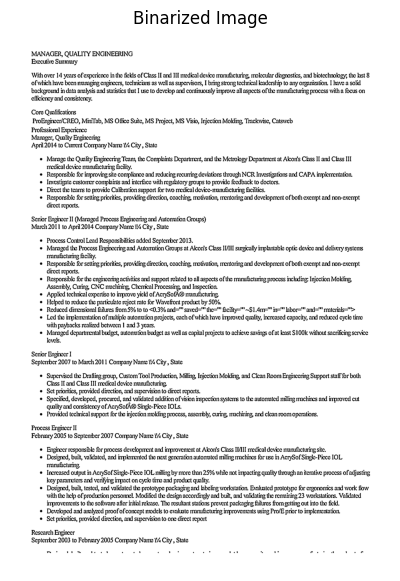

In [ ]:
binarized_image = binarize_image(blur_reduced_image)
display_image(binarized_image, "Binarized Image")

In [ ]:
def deskew_image(image):
    """
    Corrects the skew of an image by finding the minimum area rectangle
    of the text block and rotating accordingly.
    """
    # Find all non-zero (white) pixels
    coords = cv2.findNonZero(image)

    # Get the minimum area bounding rectangle
    # It returns (center(x,y), (width, height), angle of rotation)
    rect = cv2.minAreaRect(coords)
    angle = rect[-1] - 90

    # The `cv2.minAreaRect` angle has a specific range.
    # We need to adjust it for our rotation.
    if angle < -45:
        angle = -(90 + angle)
    else:
        angle = angle

    # Get the rotation matrix and rotate the image
    (h, w) = image.shape[:2]
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated = cv2.warpAffine(image, M, (w, h),
                             flags=cv2.INTER_CUBIC,
                             borderMode=cv2.BORDER_REPLICATE)
    print(f"Detected skew angle: {angle:.2f} degrees")

    # Now, rotate the original grayscale image by the same angle
    (h, w) = rotated.shape
    center = (w // 2, h // 2)
    M = cv2.getRotationMatrix2D(center, angle, 1.0)
    deskewed_gray = cv2.warpAffine(rotated, M, (w, h),
                                  flags=cv2.INTER_CUBIC,
                                  borderMode=cv2.BORDER_REPLICATE)

    return deskewed_gray

In [ ]:
deskewed_image = deskew_image(binarized_image)

Detected skew angle: 0.00 degrees


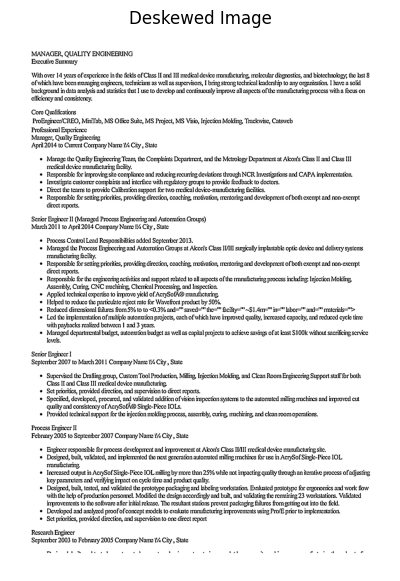

In [ ]:
display_image(deskewed_image, "Deskewed Image")

In [ ]:
def process_one_image(image):
  image = convert_to_grayscale(image)
  print("Converted image to grayscale..")
  image = reduce_noise(image)
  print("Reduced noise in the image..")
  image = binarize_image(image)
  print("Binarized the image..")
  image = deskew_image(image)
  print("Corrected image orientation..")
  return image

In [ ]:
import time
output_folder_path = "/content/processed_images"
start_time = time.time()

# Create the output folder if it doesn't exist
os.makedirs(output_folder_path, exist_ok=True)
print(f"Created folder: {output_folder_path}")

# Directory containing the converted images from the previous step
converted_images_dir = "/content/converted_random_resume_images_pdf2image"

print(f"Starting to process images from: {converted_images_dir}")

# Walk through the converted images directory
for root, dirs, files in os.walk(converted_images_dir):
    for file_name in files:
        if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(root, file_name)
            print(f"Processing image: {image_path}")

            try:
                image = cv2.imread(image_path)
                if image is None:
                    print(f"Warning: Could not read image {image_path}. Skipping.")
                    continue

                processed_image = process_one_image(image)

                # Construct the output path, preserving the category subdirectory structure
                relative_path = os.path.relpath(root, converted_images_dir)
                output_subdir = os.path.join(output_folder_path, relative_path)
                os.makedirs(output_subdir, exist_ok=True) # Ensure output subdirectory exists

                output_path = os.path.join(output_subdir, file_name)
                cv2.imwrite(output_path, processed_image)
                print(f"Saved processed image to: {output_path}")
                print("-" * 50)

            except Exception as e:
                print(f"An error occurred while processing {image_path}: {e}")
                print("-" * 50)


print("Processing images is completed.")
print(f"Total time taken: {time.time() - start_time} seconds")

Created folder: /content/processed_images
Starting to process images from: /content/converted_random_resume_images_pdf2image
Processing image: /content/converted_random_resume_images_pdf2image/HEALTHCARE/HEALTHCARE_17963031_page_1.jpg
Converted image to grayscale..
Reduced noise in the image..
Binarized the image..
Detected skew angle: 0.00 degrees
Corrected image orientation..
Saved processed image to: /content/processed_images/HEALTHCARE/HEALTHCARE_17963031_page_1.jpg
--------------------------------------------------
Processing image: /content/converted_random_resume_images_pdf2image/HEALTHCARE/HEALTHCARE_17963031_page_2.jpg
Converted image to grayscale..
Reduced noise in the image..
Binarized the image..
Detected skew angle: 0.00 degrees
Corrected image orientation..
Saved processed image to: /content/processed_images/HEALTHCARE/HEALTHCARE_17963031_page_2.jpg
--------------------------------------------------
Processing image: /content/converted_random_resume_images_pdf2image/HEALT

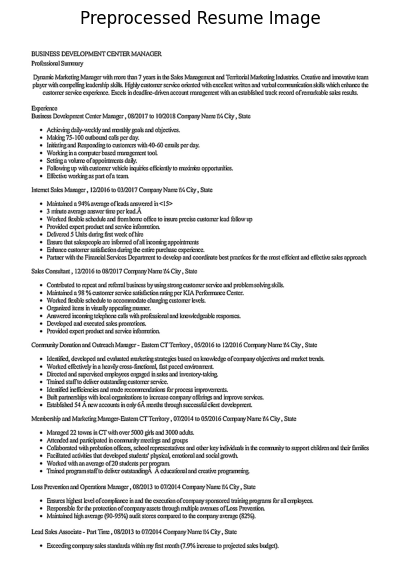

In [ ]:
preprocessed_image = cv2.imread("/content/processed_images/BUSINESS-DEVELOPMENT/BUSINESS-DEVELOPMENT_14241621_page_1.jpg")
display_image(preprocessed_image, "Preprocessed Resume Image")

In [ ]:
! pip install pytesseract pillow

In [ ]:
from PIL import Image
import pytesseract


text = pytesseract.image_to_string(Image.open("/content/processed_images/BUSINESS-DEVELOPMENT/BUSINESS-DEVELOPMENT_14241621_page_1.jpg"))

print(text)

BUSINESS DEVELOPMENT CENTER MANAGER
Professional Summary

Dynamic Marketing Manager with more than 7 years in the Sales Management and Territorial Marketing Industries. Creative and innovative team
phyer with compelling leadership skills. Highly customer service oriented with excellent written and verbal communication skills which enhance the
customer service experience. Excels in deadline-driven account management with an established track record of remarkable saks results.

Experience
Business Development Center Manager , 08/2017 to 10/2018 Company Name 1% City , State

* Achieving daily-weekly and monthly goals and objectives.

© Making 75-100 outbound calls per day.

© Initiating and Responding to customers with 40-60 emuils per day.

* Working ina computer based management tool.

© Setting a volume of appointments daily.

© Following up with customer vehicle inquiries efficiently to maximize opportunities.
© Effective working as part ofa team.

Intemet Sales Manager , 12/2016 to 0

In [ ]:
from PIL import Image
import pytesseract
import time
import os

input_folder_path = "/content/processed_images"
output_folder_path = "/content/tesseract_output_combined"
start_time = time.time()

os.makedirs(output_folder_path, exist_ok=True)
print(f"Created folder: {output_folder_path}")

# Dictionary to hold processed images grouped by original resume filename
resume_images = {}

print(f"Collecting processed images from: {input_folder_path}")

# Walk through the processed images directory to group images by original resume
for root, dirs, files in os.walk(input_folder_path):
    for file_name in files:
        if file_name.lower().endswith(('.jpg', '.jpeg', '.png')):
            image_path = os.path.join(root, file_name)
            # Extract the original resume filename from the processed image filename
            # Assuming the format is CATEGORY_ORIGINALFILENAME_page_pagenumber.jpg
            parts = file_name.split('_')
            if len(parts) >= 3:
                original_filename = '_'.join(parts[1:-2]) # Reconstruct original filename (excluding category, and page info)
                if original_filename not in resume_images:
                    resume_images[original_filename] = []
                resume_images[original_filename].append(image_path)
            else:
                print(f"Skipping image with unexpected filename format: {file_name}")

print(f"Found {len(resume_images)} unique resumes to process.")

# Process each resume
for original_filename, image_paths in resume_images.items():
    print(f"\nProcessing resume: {original_filename}")
    # Sort image paths by page number to ensure correct text order
    image_paths.sort()

    combined_text = ""
    for image_path in image_paths:
        try:
            print(f"  Extracting text from page: {os.path.basename(image_path)}")
            text = pytesseract.image_to_string(Image.open(image_path))
            combined_text += text + "\n\n" # Add extracted text and a separator

        except Exception as e:
            print(f"  An error occurred while extracting text from {os.path.basename(image_path)}: {e}")

    # Save the combined text to a single file
    output_filename = f"{original_filename}.txt"
    output_path = os.path.join(output_folder_path, output_filename)

    with open(output_path, "w") as f:
        f.write(combined_text)

    print(f"Saved combined extracted text to {output_path}")
    print("-" * 50)


print("\nText Extraction Completed.")
print(f"Total time taken: {time.time() - start_time} seconds")

Created folder: /content/tesseract_output_combined
Found 20 unique resumes to process.

Processing resume: 17963031
  Extracting text from page: HEALTHCARE_17963031_page_1.jpg
  Extracting text from page: HEALTHCARE_17963031_page_2.jpg
Saved combined extracted text to /content/tesseract_output_combined/17963031.txt
--------------------------------------------------

Processing resume: 17539842
  Extracting text from page: HEALTHCARE_17539842_page_1.jpg
  Extracting text from page: HEALTHCARE_17539842_page_2.jpg
Saved combined extracted text to /content/tesseract_output_combined/17539842.txt
--------------------------------------------------

Processing resume: 24770846
  Extracting text from page: CONSTRUCTION_24770846_page_1.jpg
  Extracting text from page: CONSTRUCTION_24770846_page_2.jpg
Saved combined extracted text to /content/tesseract_output_combined/24770846.txt
--------------------------------------------------

Processing resume: 27182111
  Extracting text from page: ADVOCATE

In [ ]:
prompt = """
### **ROLE**

You are an **AI Resume Parsing Expert** with deep knowledge in **OCR text interpretation, natural language processing, and human resource analytics**. You specialize in accurately extracting structured information from resumes, even when OCR results may contain recognition errors or formatting inconsistencies.

---

### **CONTEXT**

The AI receives text extracted from a **grayscale, noise-reduced, binarized, and deskewed resume image** that has undergone preprocessing using **OpenCV**.
The text itself has been extracted using **Tesseract OCR**.
Due to possible OCR inaccuracies (e.g., misread characters, line breaks, or misplaced formatting), the AI may need to intelligently interpret and correct minor errors before extracting information.

The user wants a **structured JSON output** that captures key resume details:

* Name
* Skills
* Work Experience (company name, role, and employment dates)
* Certifications (Courses done across various platforms)

---

### **TASK**

1. Analyze the provided OCR text of a resume.
2. Identify and extract the following information:

   * **Name:** The candidate’s full name.
   * **Skills:** All listed professional or technical skills.
   * **Experience:** Each employment record, including company name, role/title, and employment dates.
   * **Certifications:** Courses done across various platforms (if available).
3. If any extracted text appears incorrect due to OCR errors, intelligently correct it using context clues.
4. Return **only** the final structured JSON output containing the extracted and corrected information.

---

### **CONSTRAINTS**

* Do **not** include explanations, reasoning, or commentary in the output.
* Do **not** output any text outside the specified JSON format.
* If a section (e.g., Certification or Experience) cannot be confidently extracted, show None.
* Maintain human-readable capitalization for names, institutions, and job titles.
* Use consistent formatting and avoid including extra punctuation or line breaks within JSON values.

---

### **EXAMPLES**

#### **Input (excerpt of OCR text):**

```
Johnathan Doe
Software Engineer | Python | Machine Learning | Data Analysis
Experience
ABC Technologies - Software Engineer (Jan 2020 - May 2023)
XYZ Corp - Junior Developer (Jun 2018 - Dec 2019)
Certifications
Data Science Bootcamp, Coding Ninjas
Git and GitHub, Coursera
```

#### **Output:**

```json
{
  "name": "Johnathan Doe",

  "skills": ["Python", "Machine Learning", "Data Analysis"],

  "experience": [

    {"company": "ABC Technologies",
    "role": "Software Engineer",
    "dates": "Jan 2020 - May 2023"},

    {"company": "XYZ Corp", "role":
    "Junior Developer",
     "dates": "Jun 2018 - Dec 2019"}
  ],
  "certification": [

    {"certification": "Data Science Bootcamp", "by": "Coding Ninjas"},

    {"certification": "Git and GitHub" "by": "Coursera"}
  ]
}
```

---

### **OUTPUT FORMAT**

Return your final answer **only** in this JSON structure:

```json
{
    {
    "name": "NAME",
    "skills": [],
    "experience": [],
    "certification": []
}
}
```


"""

In [ ]:
from google import genai
from google.colab import userdata # colab only code
from PIL import Image
import json
import time

In [ ]:
genai_client = genai.Client(api_key=userdata.get('project16gfg'))

In [ ]:
image_folder_path = "/content/processed_images"
text_folder_path = "/content/tesseract_output_combined" # Changed to combined text output folder
output_folder_path = "/content/json_output_new"

start_time = time.time()

os.makedirs(output_folder_path, exist_ok=True)
print(f"Created folder: {output_folder_path}")

# Get list of text files to process
text_files = [f for f in os.listdir(text_folder_path) if f.endswith('.txt')]
total_files = len(text_files)
print(f"Total text files in folder: {total_files}")

for i, text_file_name in enumerate(text_files, 1):
    print(f"Processing file {i}/{total_files}: {text_file_name}")
    text_path = os.path.join(text_folder_path, text_file_name)
    print(f"Loading extracted text: {text_path}")

    try:
        with open(text_path, "r") as f:
            text = f.read()

        print("Extracting information from text using LLM..")

        # Assuming the prompt is defined in a previous cell as 'prompt'
        full_prompt = prompt + text

        # Use the pre-defined genai_client
        contents = [
            {
                "text": full_prompt
            }
        ]
        response = genai_client.models.generate_content(model='gemini-2.5-flash', contents=contents)

        # Access the usage_metadata attribute
        usage_metadata = response.usage_metadata

        # Print the different token counts
        print(f"Input Token Count: {usage_metadata.prompt_token_count}")
        # print(f"Thoughts Token Count: {response.usage_metadata.thoughts_token_count}") # Not available for all models/versions
        print(f"Output Token Count: {usage_metadata.candidates_token_count}")
        print(f"Total Token Count: {usage_metadata.total_token_count}")


        # Attempt to parse the JSON output, handling potential formatting issues
        try:
            extracted_information = json.loads(response.text.replace('```json', '').replace('```', '').strip())
        except json.JSONDecodeError as e:
            print(f"JSON decoding error for {text_file_name}: {e}")
            print(f"Response text: {response.text}")
            extracted_information = {"error": "JSONDecodeError", "message": str(e), "raw_response": response.text}


        output_filename = text_file_name.replace(".txt", ".json")
        output_path = os.path.join(output_folder_path, output_filename)
        with open(output_path, "w") as f:
            json.dump(extracted_information, f, indent=4)

        print(f"Saved extracted information to {output_path}")
        print("-" * 50)

    except Exception as e:
        print(f"An error occurred while processing {text_file_name}: {e}")
        print("-" * 50)

    # Add a small delay to avoid hitting API limits
    time.sleep(1)


print("Information Extraction Completed.")
print(f"Total time taken: {time.time() - start_time} seconds")

Created folder: /content/json_output_new
Total text files in folder: 20
Processing file 1/20: 26671167.txt
Loading extracted text: /content/tesseract_output_combined/26671167.txt
Extracting information from text using LLM..
An error occurred while processing 26671167.txt: 503 UNAVAILABLE. {'error': {'code': 503, 'message': 'The model is overloaded. Please try again later.', 'status': 'UNAVAILABLE'}}
--------------------------------------------------
Processing file 2/20: 72652441.txt
Loading extracted text: /content/tesseract_output_combined/72652441.txt
Extracting information from text using LLM..
An error occurred while processing 72652441.txt: 503 UNAVAILABLE. {'error': {'code': 503, 'message': 'The model is overloaded. Please try again later.', 'status': 'UNAVAILABLE'}}
--------------------------------------------------
Processing file 3/20: 26924514.txt
Loading extracted text: /content/tesseract_output_combined/26924514.txt
Extracting information from text using LLM..
Input Token 

In [ ]:
import json
import os

# Specify the directory where the JSON files are saved
json_output_dir = "/content/json_output_new"

# Get a list of all JSON files in the directory
json_files = [f for f in os.listdir(json_output_dir) if f.endswith('.json')]

if json_files:
    # Select the first JSON file from the list
    sample_json_file = "24770846.json"
    sample_json_path = os.path.join(json_output_dir, sample_json_file)

    print(f"Loading and displaying content of: {sample_json_path}")

    try:
        # Load the JSON data
        with open(sample_json_path, 'r') as f:
            data = json.load(f)

        # Dump the JSON data to a string and print the text
        json_text = json.dumps(data, indent=4)
        print(json_text)

    except FileNotFoundError:
        print(f"Error: {sample_json_path} not found.")
    except json.JSONDecodeError:
        print(f"Error: Could not decode JSON from {sample_json_path}.")
    except Exception as e:
        print(f"An error occurred: {e}")

else:
    print(f"No JSON files found in the directory: {json_output_dir}")

Loading and displaying content of: /content/json_output_new/24770846.json
{
    "name": null,
    "skills": [
        "Building inspector ICC/IBC and ICCARC",
        "NAVFAC Army Corps Engineering Contractor Quality Management (CQM)",
        "Electrical Safety High Voltage & Low Voltage",
        "Overhead Cranes & Jib Hoist Inspection",
        "NFPA 70E Electrical Safety",
        "Grounding and Bonding Electrical Systems"
    ],
    "experience": [
        {
            "company": "Company Name",
            "role": "Construction Safety Manager",
            "dates": "07/2015 to 02/2017"
        },
        {
            "company": "Company Name",
            "role": "Construction Safety Manager",
            "dates": "04/1998 to 11/2014"
        }
    ],
    "certification": [
        {
            "certification": "HAZARDOUS MATERIALS WASTE (2015)",
            "by": "OSHA"
        },
        {
            "certification": "OSHA 500/510 Authorized to Train",
            "by": "OS

In [34]:
import json
import os

# Specify the directory where the JSON files are saved
json_output_dir = "/content/json_output_new"

# Get a list of all JSON files in the directory
json_files = [f for f in os.listdir(json_output_dir) if f.endswith('.json')]

if json_files:
    # Select the first JSON file from the list
    sample_json_file = "33685075.json"
    sample_json_path = os.path.join(json_output_dir, sample_json_file)

    print(f"Loading and displaying content of: {sample_json_path}")

    try:
        # Load the JSON data
        with open(sample_json_path, 'r') as f:
            data = json.load(f)

        # Dump the JSON data to a string and print the text
        json_text = json.dumps(data, indent=4)
        print(json_text)

    except FileNotFoundError:
        print(f"Error: {sample_json_path} not found.")
    except json.JSONDecodeError:
        print(f"Error: Could not decode JSON from {sample_json_path}.")
    except Exception as e:
        print(f"An error occurred: {e}")

else:
    print(f"No JSON files found in the directory: {json_output_dir}")

Loading and displaying content of: /content/json_output_new/33685075.json
{
    "name": null,
    "skills": [
        "ProEngineer/CREO",
        "MiniTab",
        "MS Office Suite",
        "MS Project",
        "MS Visio",
        "Injection Molding",
        "Trackwise",
        "Catsweb",
        "Manufacturing",
        "Assembly",
        "Automation",
        "Budget",
        "Calibration",
        "CNC",
        "Coaching",
        "Stat Graphics",
        "Process Engineering",
        "Manufacturing process development and improvement",
        "Manufacturing yield improvement",
        "CIP"
    ],
    "experience": [
        {
            "company": "Company Name 1",
            "role": "Manager, Quality Engineering",
            "dates": "April 2014 to Current"
        },
        {
            "company": "Company Name 1",
            "role": "Senior Engineer II",
            "dates": "March 2011 to April 2014"
        },
        {
            "company": "Company Name 1",

## Summary of Resume Parser OCR Assignment

This notebook demonstrates a pipeline for parsing resume information from PDF files using OCR and an LLM.

**1. Data Loading:**
- The `resume-dataset` from Kaggle Hub was downloaded and loaded.
- A list of resume categories was identified.
- 20 random PDF resume files were selected for processing.

**2. PDF to Image Conversion:**
- The `PyMuPDF` and `pdf2image` libraries were installed and used to convert the selected PDF files into JPG images, with each page saved as a separate image.
- The converted images were saved to `/content/converted_random_resume_images_pdf2image`, maintaining the original category structure.

**3. Image Preprocessing:**
- A series of image preprocessing steps using OpenCV were applied to the converted JPG images to enhance them for OCR:
    - **Grayscale Conversion:** Converting the images to grayscale (`convert_to_grayscale`).
    - **Noise Reduction:** Applying Gaussian blur to reduce noise (`reduce_noise`).
    - **Binarization (Thresholding):** Converting the images to binary (black and white) using adaptive thresholding (`binarize_image`).
    - **Deskewing:** Correcting image skew (`deskew_image`).
- A function `process_one_image` was created to combine these preprocessing steps.
- This preprocessing pipeline was applied to all converted images, and the processed images were saved to `/content/processed_images`, preserving the category structure.

**4. Text Extraction (OCR):**
- The `pytesseract` library was installed and used to perform OCR on the processed images.
- The text extracted from all pages of a single resume was combined into one text file per resume.
- The combined extracted text files were saved to `/content/tesseract_output_combined`.

**5. Information Extraction (LLM):**
- A prompt was defined to guide an LLM (Gemini 2.5 Flash) to act as an AI Resume Parsing Expert.
- The LLM was tasked with analyzing the combined text from each resume and extracting structured information including Name, Skills, Work Experience (company, role, dates), and Education (institution, degree, year).
- The code iterated through the combined text files, sent the text to the LLM, and received JSON output containing the extracted information.
- The extracted information in JSON format was saved to `/content/json_output`, with one JSON file per original resume.

**Outcome:**
The notebook successfully demonstrates how to load PDF resumes, convert them to images, preprocess the images for OCR, extract text using Tesseract, and finally use an LLM to parse the raw text into a structured JSON format, with each resume's information consolidated into a single output file.